# Zillow Home Value (Zestimate) Prediction

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv("/content/Zillow.csv")

df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,target
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940


In [38]:
df.shape

(77613, 59)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   airconditioningtypeid         25007 non-null  float64
 2   architecturalstyletypeid      207 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77579 non-null  float64
 5   bedroomcnt                    77579 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49809 non-null  float64
 8   calculatedbathnbr             76963 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6037 non-null   float64
 11  calculatedfinishedsquarefeet  77378 non-null  float64
 12  finishedsquarefeet12          73923 non-null  float64
 13  f

In [42]:
for col in df.select_dtypes(include=["object"]).columns.tolist():
  print(df[col].value_counts())
  print("\n\n")

hashottuborspa
True    1539
Name: count, dtype: int64



propertycountylandusecode
0100    26782
122     13067
010C     8838
0101     6413
34       4932
        ...  
030G        1
105         1
020G        1
020M        1
020E        1
Name: count, Length: 75, dtype: int64



propertyzoningdesc
LAR1          6766
LAR3          2450
LARS          1394
LBR1N         1225
LARD1.5       1132
              ... 
POR31OOO         1
LVPR3D-A1-       1
WV RPD56*        1
POC4-R3200       1
SFR2             1
Name: count, Length: 1907, dtype: int64



fireplaceflag
True    172
Name: count, dtype: int64



taxdelinquencyflag
Y    2900
Name: count, dtype: int64





In [52]:
df["hashottuborspa"].fillna(False, inplace=True)
df["fireplaceflag"].fillna(False, inplace=True)
df["taxdelinquencyflag"].fillna(False, inplace=True)

In [59]:
df["taxdelinquencyflag"] = df["taxdelinquencyflag"].replace({"Y":True,"False":False })

df["taxdelinquencyflag"].value_counts()


,count
taxdelinquencyflag,
False,74713
True,2900


In [61]:
bool_cols = df.select_dtypes(include=["bool"]).columns

df[bool_cols] = df[bool_cols].astype("int")

In [63]:
remove_cols = []

for col in df.columns:
  if (df[col].isnull()).mean() > 0.60:
    remove_cols.append(col)

df = df.drop(remove_cols, axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   bathroomcnt                   77579 non-null  float64
 2   bedroomcnt                    77579 non-null  float64
 3   buildingqualitytypeid         49809 non-null  float64
 4   calculatedbathnbr             76963 non-null  float64
 5   calculatedfinishedsquarefeet  77378 non-null  float64
 6   finishedsquarefeet12          73923 non-null  float64
 7   fips                          77579 non-null  float64
 8   fullbathcnt                   76963 non-null  float64
 9   hashottuborspa                77613 non-null  int64  
 10  heatingorsystemtypeid         49571 non-null  float64
 11  latitude                      77579 non-null  float64
 12  longitude                     77579 non-null  float64
 13  l

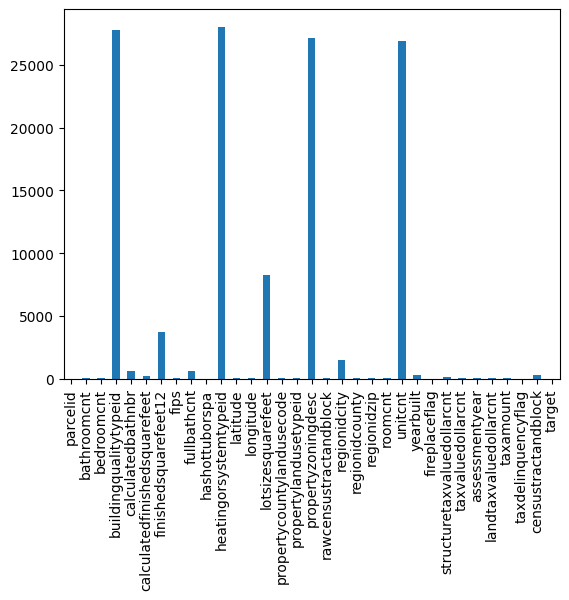

In [65]:
df.isnull().sum().plot.bar()

plt.show()

In [66]:
obj_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(include=["number"]).columns

for col in obj_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())


df.isnull().sum().any()

np.False_

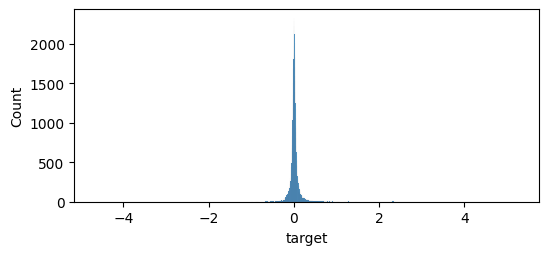

In [69]:
plt.figure(figsize=(6,2.5))
sns.histplot(df["target"])
plt.show()

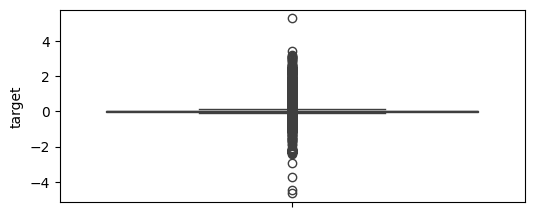

In [70]:
plt.figure(figsize=(6,2.5))
sns.boxplot(df["target"])
plt.show()

In [71]:
df = df[(df['target'] > -1) & (df['target'] < 1)]

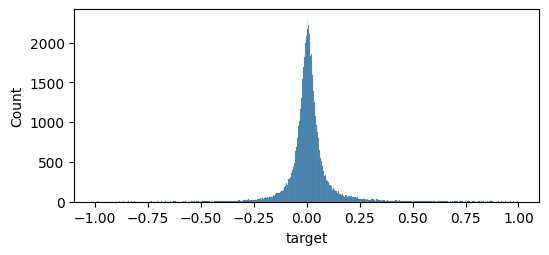

In [72]:
plt.figure(figsize=(6,2.5))
sns.histplot(df["target"])
plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()

    df[col] = le.fit_transform(df[col])

    encoders[col]=le

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77261 entries, 0 to 77612
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77261 non-null  int64  
 1   bathroomcnt                   77261 non-null  float64
 2   bedroomcnt                    77261 non-null  float64
 3   buildingqualitytypeid         77261 non-null  float64
 4   calculatedbathnbr             77261 non-null  float64
 5   calculatedfinishedsquarefeet  77261 non-null  float64
 6   finishedsquarefeet12          77261 non-null  float64
 7   fips                          77261 non-null  float64
 8   fullbathcnt                   77261 non-null  float64
 9   hashottuborspa                77261 non-null  int64  
 10  heatingorsystemtypeid         77261 non-null  float64
 11  latitude                      77261 non-null  float64
 12  longitude                     77261 non-null  float64
 13  lotsiz

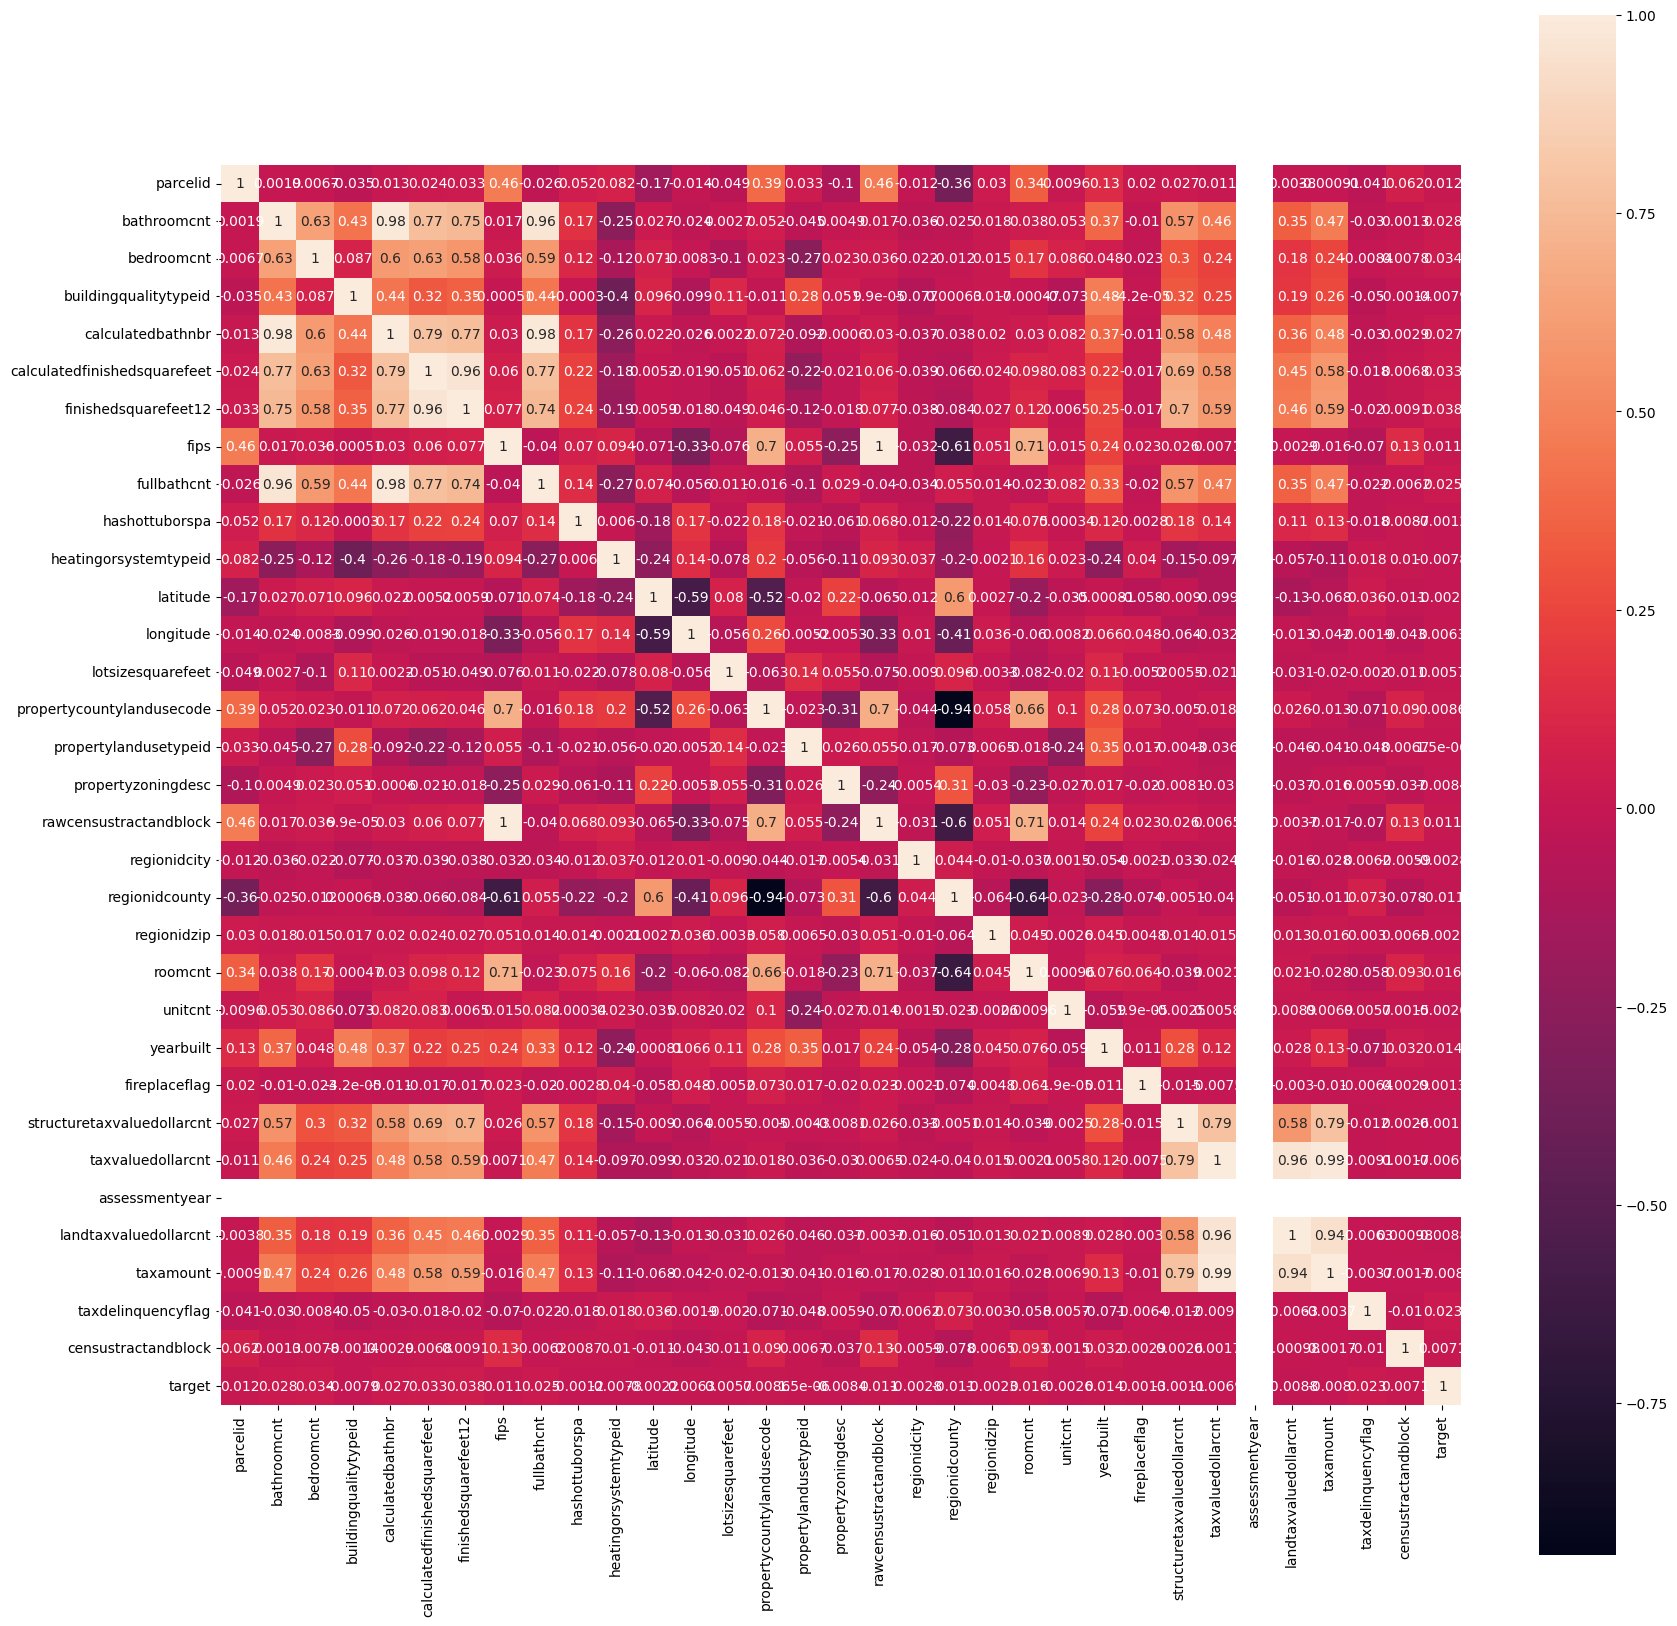

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,  square=True)
plt.show()

In [81]:
X = df.drop('target', axis=1)
y = df['target']

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

feature_scores = pd.Series(fit.scores_, index=X.columns).sort_values(ascending=False)

In [84]:
feature_scores

,0
fips,inf
regionidcounty,inf
censustractandblock,7.044454e+04
rawcensustractandblock,7.709630e+03
regionidzip,1.378217e+02
unitcnt,2.328983e+01
propertycountylandusecode,1.717081e+01
landtaxvaluedollarcnt,6.680102e+00
taxvaluedollarcnt,6.207733e+00
taxamount,6.045859e+00


In [85]:
imp_series = pd.Series(feature_scores)

imp_clean = imp_series.replace([np.inf, -np.inf], np.nan).dropna()

imp_sorted = imp_clean.sort_values(ascending=False)

top_features = imp_sorted.head(20).index.tolist()

X = df[top_features]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=22)

X_train.shape, X_test.shape

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, y_train)

    train_preds = models[i].predict(X_train)
    test_preds = models[i].predict(X_test)

    print(f'{models[i]} : ')
    print('Training Error : ', mae(y_train, train_preds))
    print('Validation Error : ', mae(y_test, test_preds))
    print('\n\n')

LinearRegression() : 
Training Error :  1.3223114622120598
Validation Error :  1.591572766121596



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.0057820710353553295
Validation Error :  0.8819298148155212



Lasso() : 
Training Error :  1.6846238402648055
Validation Error :  

In [ ]:
 #XGBRegressor - Overfitting!
 #RandomForest - Slight overfitting - best generalized!
 # all other models underfit